# Прогнозирование оттока клиентов банка (Customer Churn Prediction)

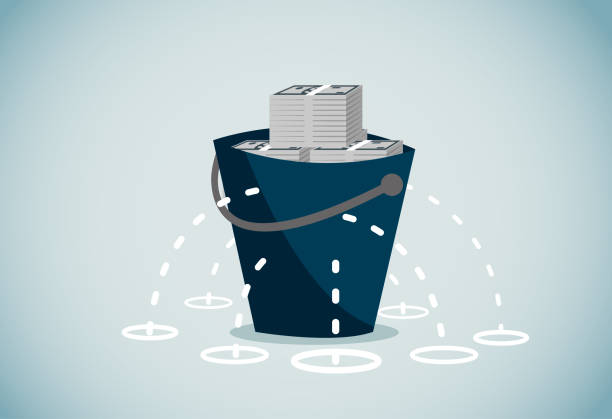

### **Цель проекта:** 
Провести разведочный анализ данных (EDA) для выявления ключевых факторов, влияющих на отток клиентов, и подготовить очищенный и обогащенный датасет для последующего построения модели машинного обучения.

### **Описание данных:**
В проекте используется датасет `Customer-Churn-Records.csv`, содержащий информацию о 10 000 клиентах банка. Для каждого клиента представлены демографические данные, информация о взаимоотношениях с банком и финансовых продуктах, а также целевая переменная `Exited`, указывающая, ушел клиент или нет.

### **Ключевые признаки:**
*   `CreditScore`: Кредитный рейтинг клиента.
*   `Geography`: Страна проживания.
*   `Gender`: Пол.
*   `Age`: Возраст.
*   `Tenure`: Количество лет, в течение которых клиент пользуется услугами банка.
*   `Balance`: Баланс на счете.
*   `NumOfProducts`: Количество продуктов банка, используемых клиентом.
*   `HasCrCard`: Наличие кредитной карты (1 - да, 0 - нет).
*   `IsActiveMember`: Активный ли клиент (1 - да, 0 - нет).
*   `EstimatedSalary`: Предполагаемая зарплата.
*   `Complain`: Наличие жалобы (1 - да, 0 - нет).
*   `Satisfaction Score`: Уровень удовлетворенности (от 1 до 5).
*   `Card Type`: Тип карты.
*   `Point Earned`: Накопленные баллы.
*   `Exited`: Целевая переменная (1 - клиент ушел, 0 - остался).

## План исследования

1.  **Импорт библиотек и загрузка данных**
2.  **Первичный осмотр данных**
3.  **Предобработка данных**
4.  **Разведочный анализ данных (EDA)**
5.  **Проверка статистических гипотез**
6.  **Подготовка к моделированию**
7.  **Обучение и оценка качества модели**
8.  **Улучшение модели / Эксперименты**
9.  **Выводы и рекомендации**

## Импорт библиотек и загрузка данных

In [89]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Настройка стиля графиков
sns.set_style('whitegrid')
%matplotlib inline

In [90]:
df = pd.read_csv('/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv', sep = ',')

print("Данные загружены. Размер:", df.shape)
df.head()

Данные загружены. Размер: (10000, 18)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## Первичный осмотр данных

In [91]:
# Информация о типах и пропусках
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [92]:
# Проверка пропусков
print("\nПропуски в каждом столбце:")
print(df.isnull().sum())

# Проверка дубликатов
print("\nКоличество дубликатов:", df.duplicated().sum())


Пропуски в каждом столбце:
RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

Количество дубликатов: 0


In [93]:
# Статистическое описание числовых признаков
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


## Предобработка данных

### Удаление неинформативных столбцов

In [94]:
# Удаляем столбцы, которые не несут смысловой нагрузки
cols_to_drop = ['RowNumber', 'CustomerId', 'Surname']
existing_cols_to_drop = [col for col in cols_to_drop if col in df.columns]

if existing_cols_to_drop:
    df.drop(columns=existing_cols_to_drop, inplace=True)
    print(f"Удалены столбцы: {existing_cols_to_drop}")
else:
    print("Нет столбцов для удаления.")

print("Оставшиеся столбцы:")
print(df.columns.tolist())

Удалены столбцы: ['RowNumber', 'CustomerId', 'Surname']
Оставшиеся столбцы:
['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score', 'Card Type', 'Point Earned']


### Переименование столбцов

In [95]:
# Переименуем столбцы с пробелами
rename_dict = {
    'Satisfaction Score': 'SatisfactionScore',
    'Card Type': 'CardType',
    'Point Earned': 'PointEarned'
    # Остальные оставляем как есть, они уже в хорошем формате
}

# Переименовываем только существующие
for old_name, new_name in rename_dict.items():
    if old_name in df.columns:
        df.rename(columns={old_name: new_name}, inplace=True)

print("Столбцы после переименования:")
print(df.columns.tolist())
df.head()

Столбцы после переименования:
['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain', 'SatisfactionScore', 'CardType', 'PointEarned']


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,SatisfactionScore,CardType,PointEarned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


### Преобразование типов данных

In [96]:
# Список категориальных столбцов
cat_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Complain', 'CardType']

for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')
        print(f"Столбец {col} преобразован в категориальный. Уникальные значения: {df[col].cat.categories.tolist()}")
    else:
        print(f"Столбец {col} не найден.")

# Проверим типы
df.info()

Столбец Geography преобразован в категориальный. Уникальные значения: ['France', 'Germany', 'Spain']
Столбец Gender преобразован в категориальный. Уникальные значения: ['Female', 'Male']
Столбец HasCrCard преобразован в категориальный. Уникальные значения: [0, 1]
Столбец IsActiveMember преобразован в категориальный. Уникальные значения: [0, 1]
Столбец Complain преобразован в категориальный. Уникальные значения: [0, 1]
Столбец CardType преобразован в категориальный. Уникальные значения: ['DIAMOND', 'GOLD', 'PLATINUM', 'SILVER']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CreditScore        10000 non-null  int64   
 1   Geography          10000 non-null  category
 2   Gender             10000 non-null  category
 3   Age                10000 non-null  int64   
 4   Tenure             10000 non-null  int64   
 5   Balance    

In [97]:
# Список числовых признаков (исключаем бинарные, которые уже сделали категориальными)
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'SatisfactionScore', 'PointEarned']

# Проверим, какие из них присутствуют
num_cols_present = [col for col in num_cols if col in df.columns]

## Разведочный анализ данных (EDA)

### Анализ числовых признаков

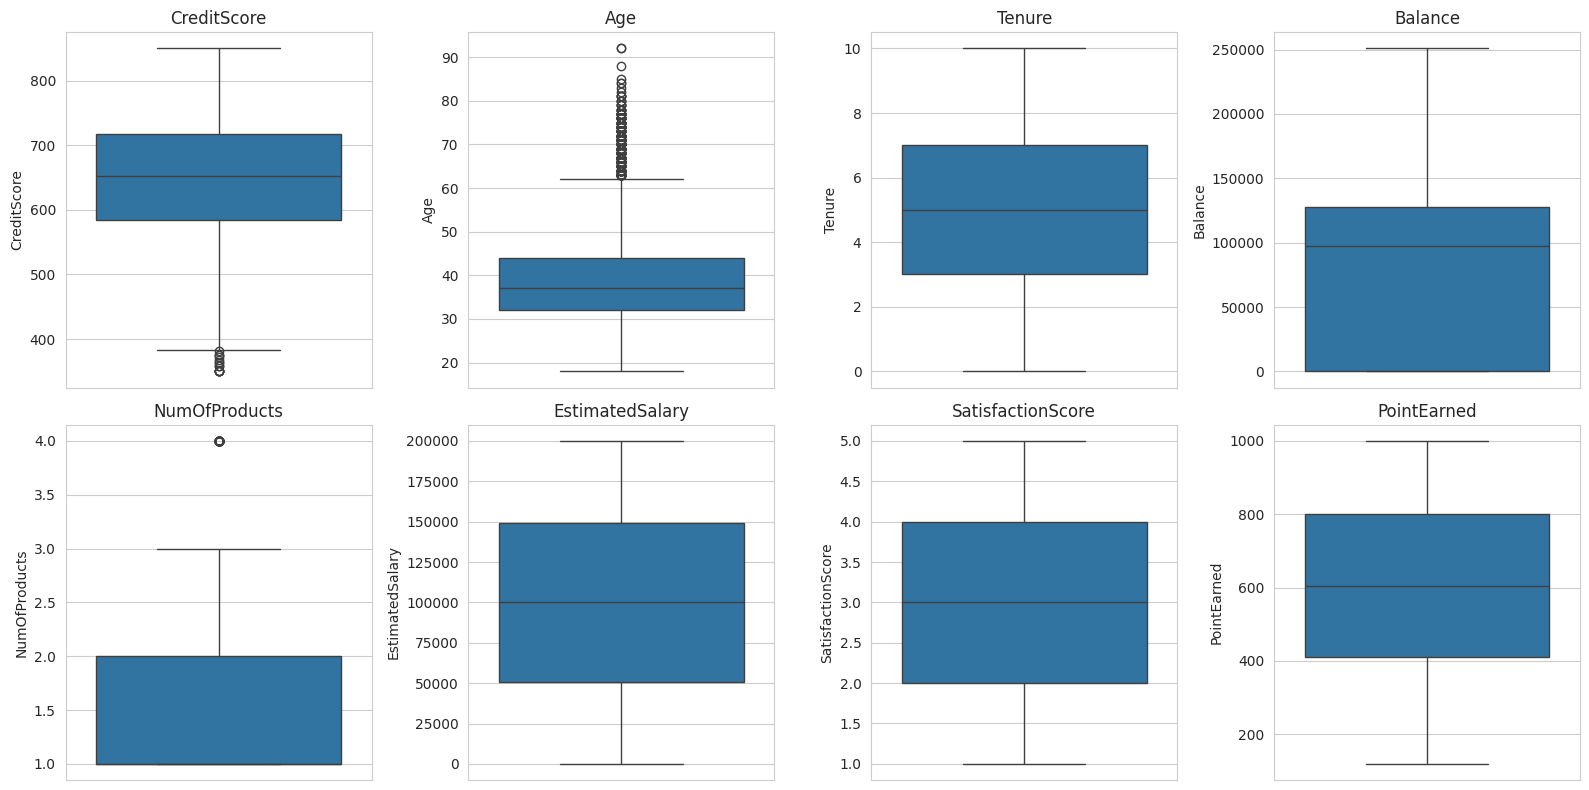

In [98]:
# Создаём сетку для графиков (например, 2x4, если 8 признаков)
n_cols = len(num_cols_present)
fig, axes = plt.subplots(2, 4, figsize=(16, 8))  # запас по размеру
axes = axes.flatten()

for i, col in enumerate(num_cols_present):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

# Скрыть лишние графики (если признаков меньше 8)
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [99]:
missing = df.isnull().sum()
if missing.sum() == 0:
    print("Пропусков нет.")
else:
    print("Пропуски в столбцах:")
    print(missing[missing > 0])

Пропусков нет.


### Анализ категориальных признаков

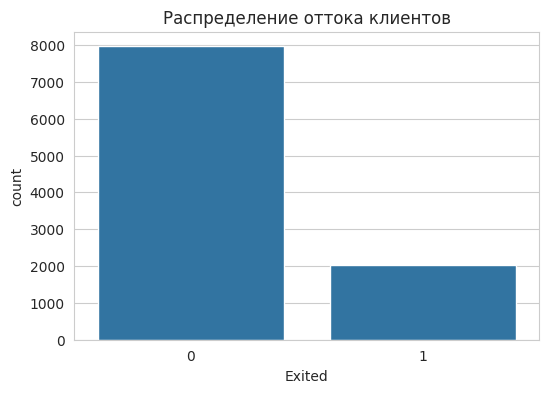

Доля ушедших клиентов: 20.38%


In [100]:
plt.figure(figsize=(6,4))
sns.countplot(x='Exited', data=df)
plt.title('Распределение оттока клиентов')
plt.show()

print("Доля ушедших клиентов: {:.2f}%".format(df['Exited'].mean() * 100))

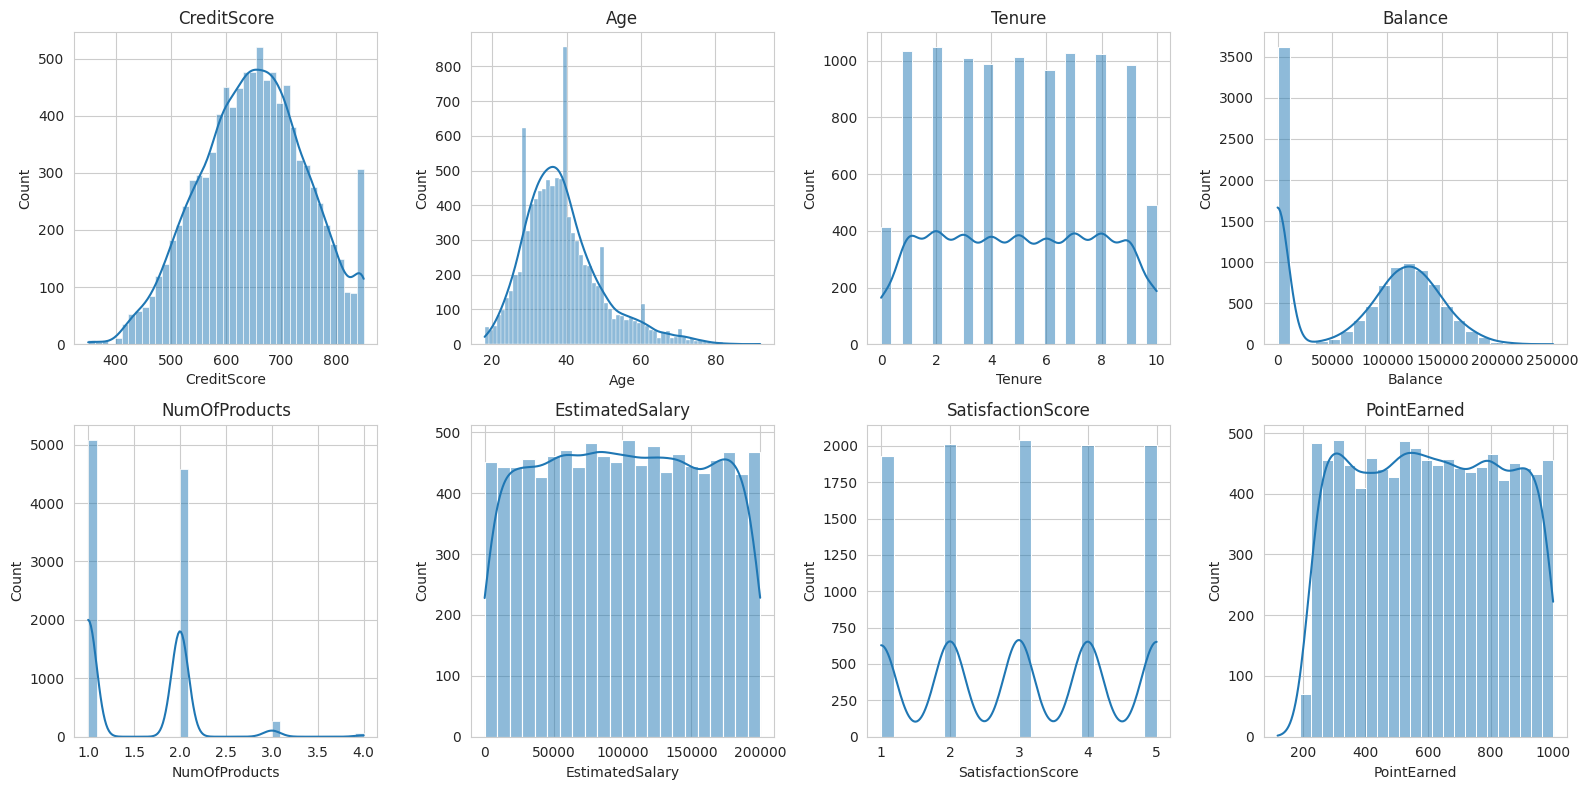

In [101]:
# Создаём сетку 2x4 (или динамически)
n = len(num_cols_present)
rows = (n + 3) // 4  # округление вверх
fig, axes = plt.subplots(rows, 4, figsize=(16, rows * 4))
axes = axes.flatten()

for i, col in enumerate(num_cols_present):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

# Скрыть лишние подграфики
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

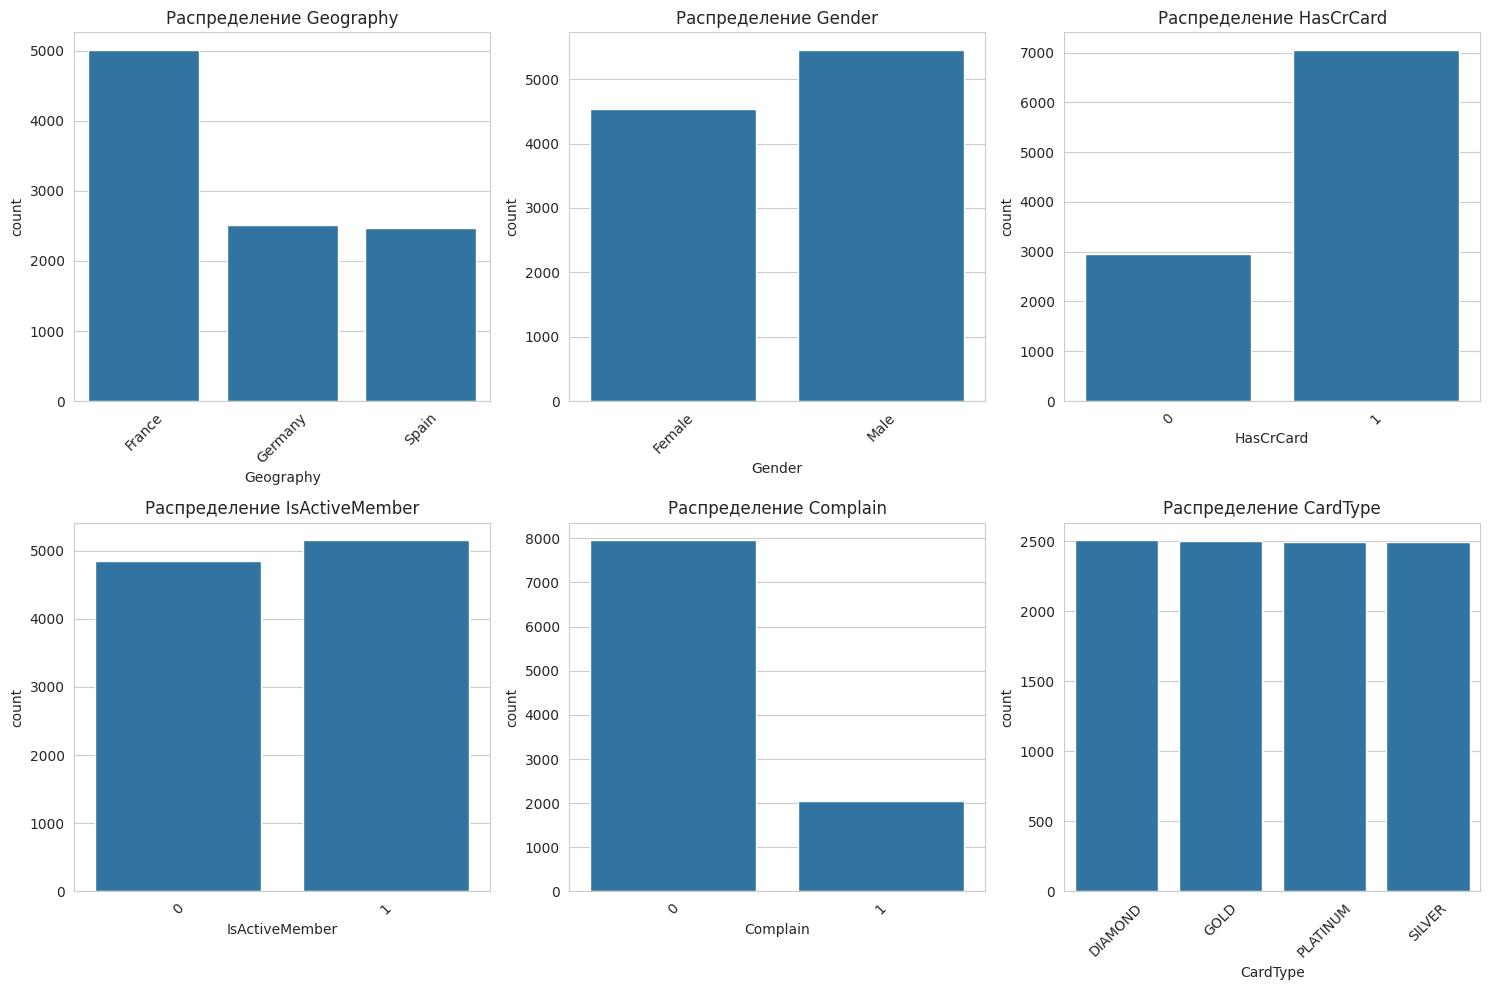

In [102]:
cat_cols_present = [col for col in cat_cols if col in df.columns]

n_cat = len(cat_cols_present)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(cat_cols_present):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Распределение {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Скрыть лишние
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

### Взаимосвязь признаков с оттоком

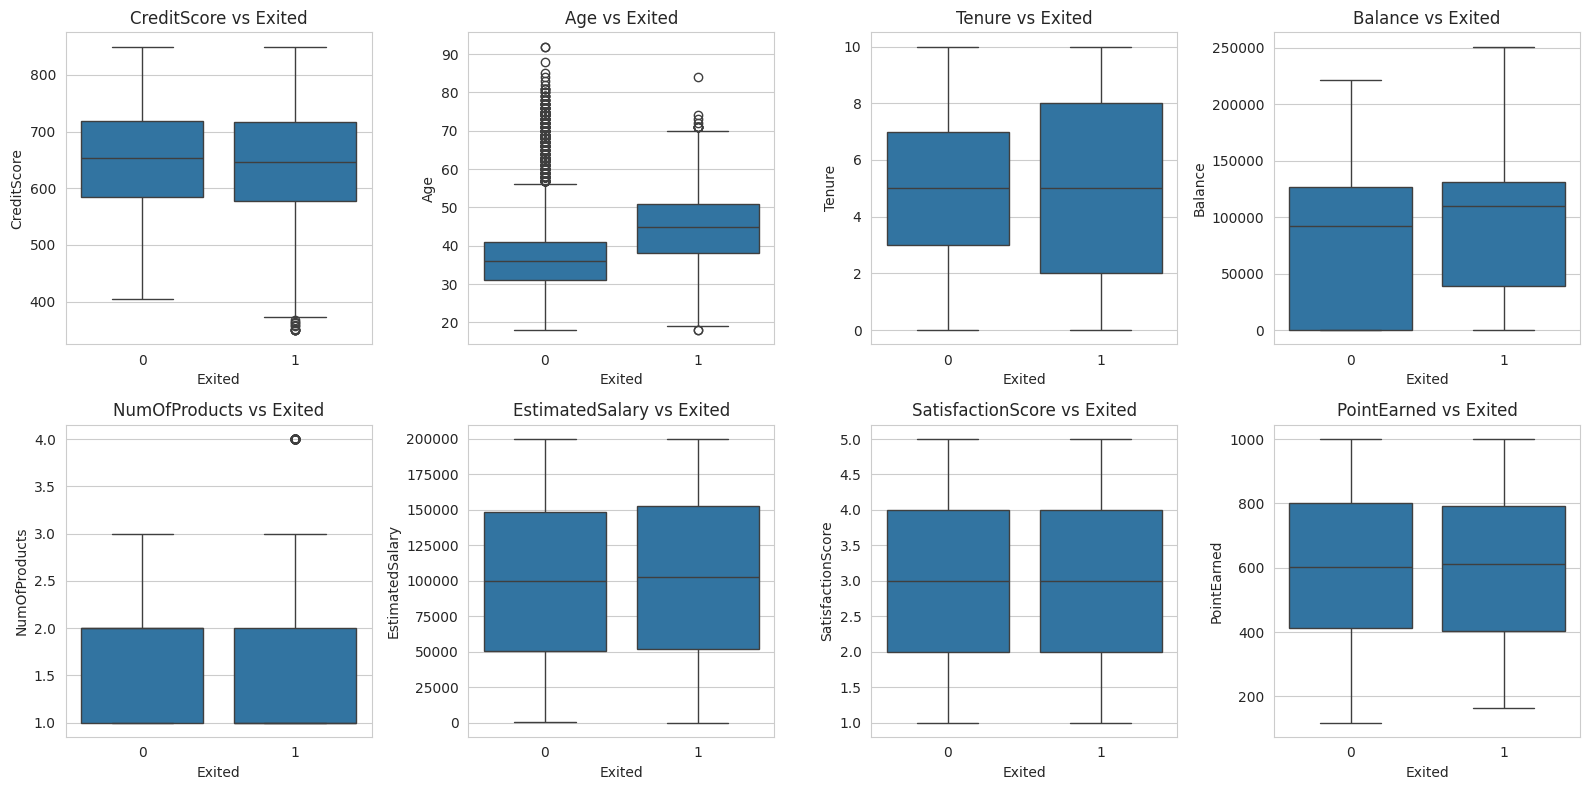

In [103]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(num_cols_present):
    sns.boxplot(x='Exited', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs Exited')

# Скрыть лишние
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

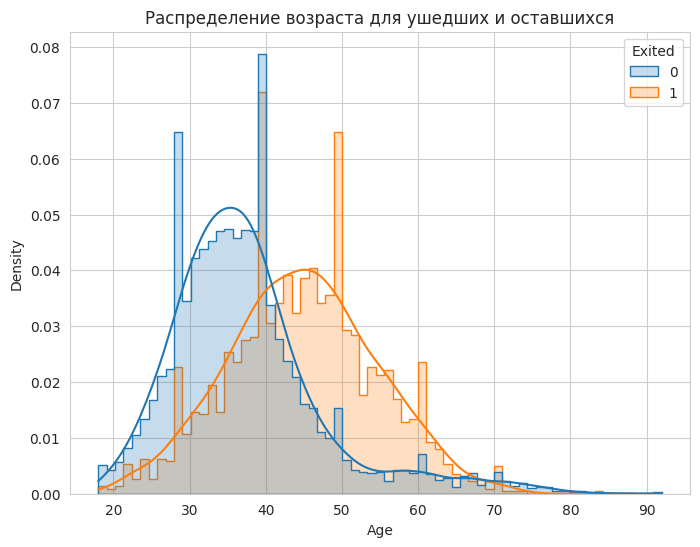

In [104]:
# Пример для Age
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='Age', hue='Exited', kde=True, element='step', stat='density', common_norm=False)
plt.title('Распределение возраста для ушедших и оставшихся')
plt.show()

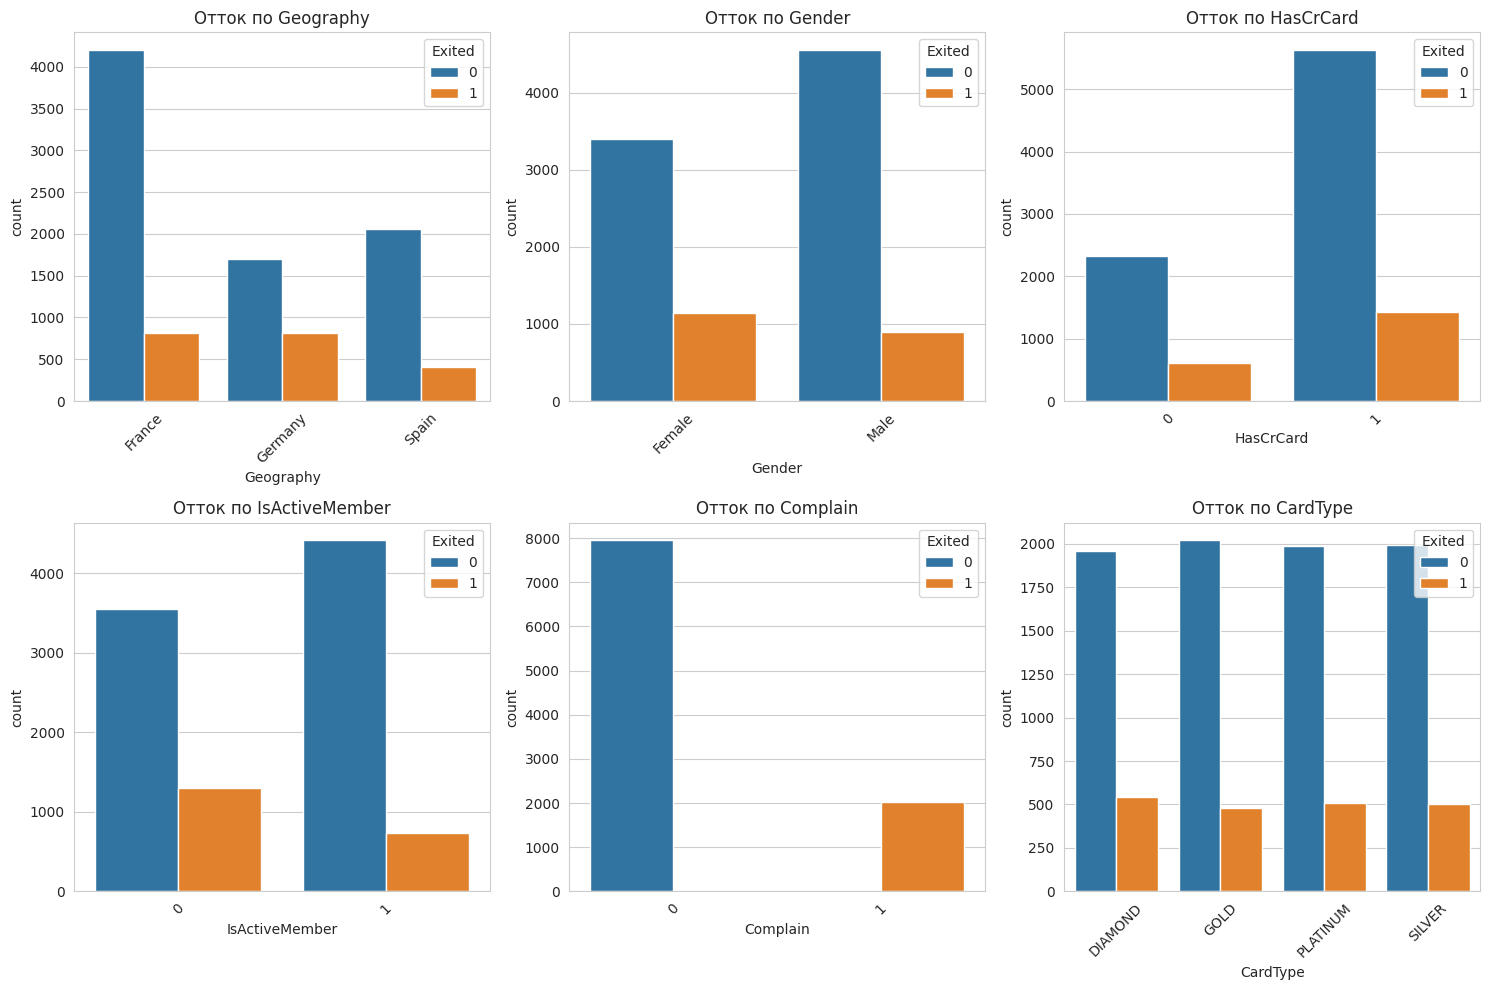

In [105]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(cat_cols_present):
    sns.countplot(x=col, hue='Exited', data=df, ax=axes[i])
    axes[i].set_title(f'Отток по {col}')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Exited')

# Скрыть лишние
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [106]:
# Бинарные категориальные признаки, которые можно перевести в 0/1
binary_cols = ['HasCrCard', 'IsActiveMember', 'Complain']

# Создаём копию только с нужными столбцами
numeric_df = df[num_cols].copy()

# Добавляем бинарные признаки, преобразуя их в int (если они ещё не числовые)
for col in binary_cols:
    if col in df.columns:
        # Если столбец категориальный, преобразуем в int (0/1)
        if df[col].dtype.name == 'category':
            numeric_df[col] = df[col].astype(int)
        else:
            numeric_df[col] = df[col]

# Проверим, что получилось
print(numeric_df.head())

   CreditScore  Age  Tenure    Balance  NumOfProducts  EstimatedSalary  \
0          619   42       2       0.00              1        101348.88   
1          608   41       1   83807.86              1        112542.58   
2          502   42       8  159660.80              3        113931.57   
3          699   39       1       0.00              2         93826.63   
4          850   43       2  125510.82              1         79084.10   

   SatisfactionScore  PointEarned  HasCrCard  IsActiveMember  Complain  
0                  2          464          1               1         1  
1                  3          456          0               1         1  
2                  3          377          1               0         1  
3                  5          350          0               0         0  
4                  5          425          1               1         0  


### Корреляционный анализ

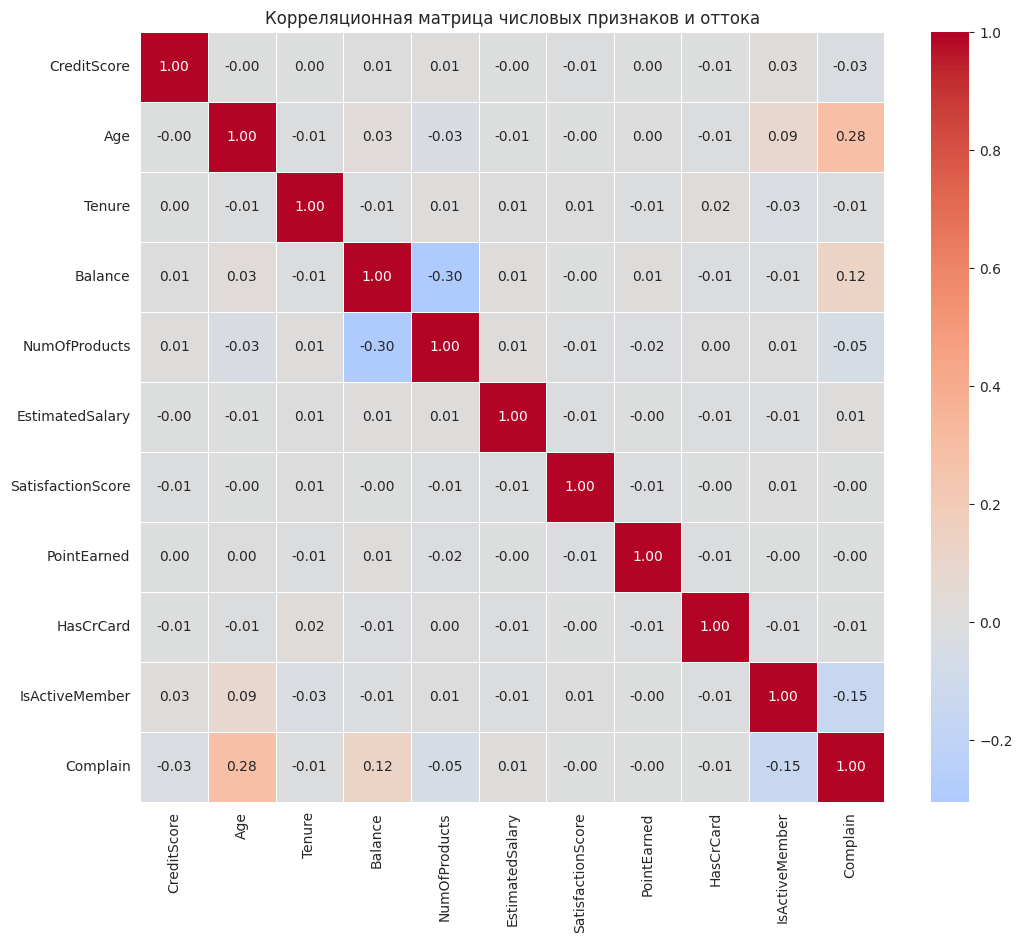

In [107]:
plt.figure(figsize=(12, 10))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
plt.title('Корреляционная матрица числовых признаков и оттока')
plt.show()

### Парные графики (pairplot)

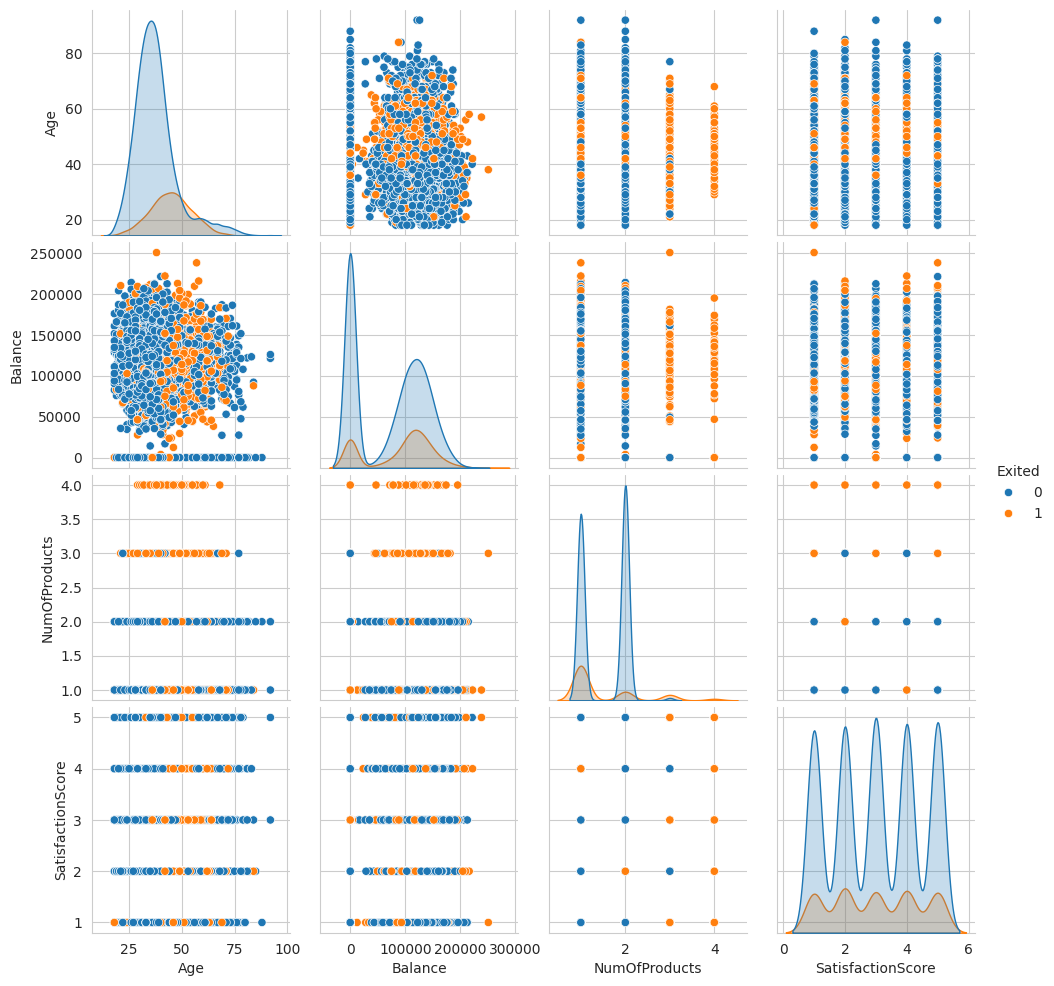

In [108]:
# Выберем признаки, которые показали заметную связь с оттоком
selected = ['Age', 'Balance', 'NumOfProducts', 'SatisfactionScore', 'Exited']
sns.pairplot(df[selected], hue='Exited', diag_kind='kde')
plt.show()

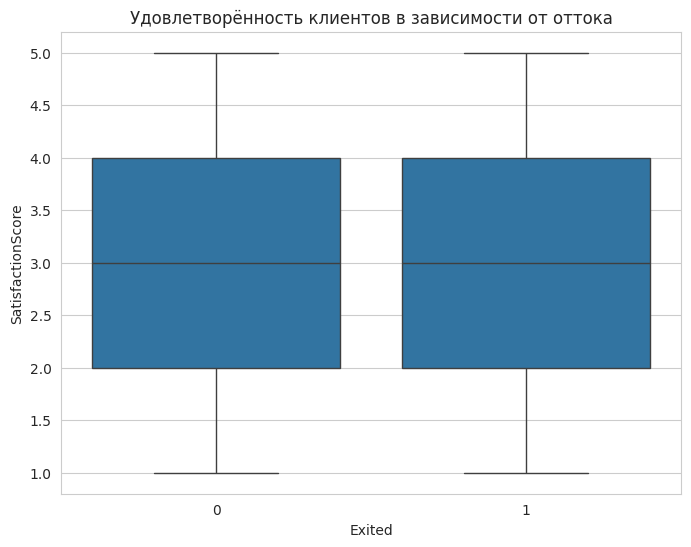

In [109]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Exited', y='SatisfactionScore', data=df)
plt.title('Удовлетворённость клиентов в зависимости от оттока')
plt.show()

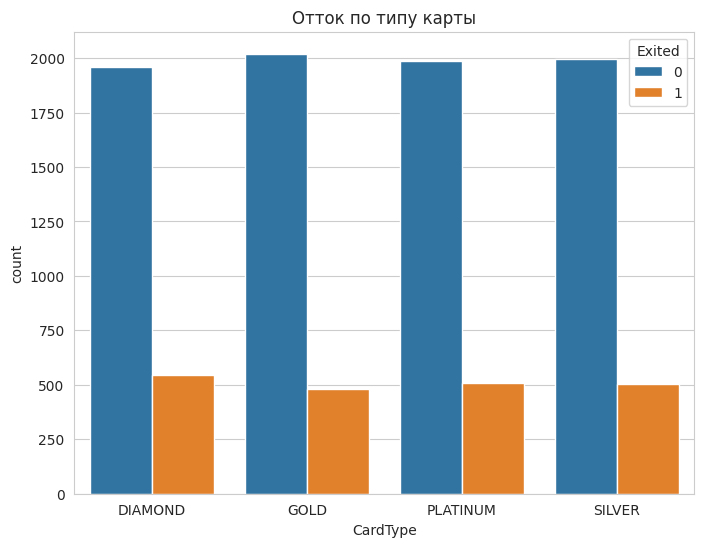

In [110]:
plt.figure(figsize=(8,6))
sns.countplot(x='CardType', hue='Exited', data=df)
plt.title('Отток по типу карты')
plt.legend(title='Exited')
plt.show()

## Проверка статистических гипотез 

На основе разведочного анализа сформулируем несколько гипотез и проверим их с помощью статистических тестов.
Для каждой гипотезы будем использовать уровень значимости α = 0.05.


### Гипотеза о возрасте
H₀: Средний возраст ушедших клиентов не отличается от среднего возраста оставшихся.

H₁: Средний возраст ушедших клиентов выше (или отличается).
Используем двухвыборочный t-тест (Уэлча), так как распределение возраста примерно нормальное и выборки большие.

In [111]:
from scipy import stats

# Разделяем данные
age_exited = df[df['Exited'] == 1]['Age']
age_not_exited = df[df['Exited'] == 0]['Age']

# t-тест (equal_var=False для учёта возможной разницы дисперсий)
t_stat, p_value = stats.ttest_ind(age_exited, age_not_exited, equal_var=False)
print(f"t-статистика: {t_stat:.3f}, p-value: {p_value:.5f}")

if p_value < 0.05:
    print("Отвергаем H₀: средний возраст значимо различается.")
else:
    print("Не отвергаем H₀: различия не значимы.")

t-статистика: 30.420, p-value: 0.00000
Отвергаем H₀: средний возраст значимо различается.


### Гипотеза о жалобах
H₀: Доля оттока среди подавших жалобу равна доле оттока среди не подававших.

H₁: Доли различаются.
Используем критерий χ² для таблицы сопряжённости.

In [112]:
# Таблица сопряжённости: Complain (0/1) vs Exited (0/1)
contingency_complain = pd.crosstab(df['Complain'], df['Exited'])
print("Таблица сопряжённости (Complain vs Exited):")
print(contingency_complain)

chi2, p_value, dof, expected = stats.chi2_contingency(contingency_complain)
print(f"χ² = {chi2:.3f}, p-value = {p_value:.5f}")

if p_value < 0.05:
    print("Отвергаем H₀: наличие жалобы связано с оттоком.")
else:
    print("Не отвергаем H₀: связь не значима.")

Таблица сопряжённости (Complain vs Exited):
Exited       0     1
Complain            
0         7952     4
1           10  2034
χ² = 9907.907, p-value = 0.00000
Отвергаем H₀: наличие жалобы связано с оттоком.


### Гипотеза об удовлетворённости (SatisfactionScore)
H₀: Распределение удовлетворённости одинаково для ушедших и оставшихся.

H₁: Распределения различаются (например, ушедшие менее удовлетворены).
Используем U-критерий Манна-Уитни, так как SatisfactionScore — дискретный (1-5) и не обязательно нормальный.

In [113]:
sat_exited = df[df['Exited'] == 1]['SatisfactionScore']
sat_not_exited = df[df['Exited'] == 0]['SatisfactionScore']

u_stat, p_value = stats.mannwhitneyu(sat_exited, sat_not_exited, alternative='two-sided')
print(f"U-статистика: {u_stat:.3f}, p-value: {p_value:.5f}")

if p_value < 0.05:
    print("Отвергаем H₀: распределения удовлетворённости различаются.")
else:
    print("Не отвергаем H₀: различия не значимы.")

U-статистика: 8046002.000, p-value: 0.55489
Не отвергаем H₀: различия не значимы.


### Гипотеза о типе карты (CardType)
H₀: Тип карты не связан с оттоком.

H₁: Существует зависимость между типом карты и оттоком.
Используем χ² для таблицы сопряжённости CardType × Exited.

In [114]:
contingency_card = pd.crosstab(df['CardType'], df['Exited'])
print("Таблица сопряжённости (CardType vs Exited):")
print(contingency_card)

chi2, p_value, dof, expected = stats.chi2_contingency(contingency_card)
print(f"χ² = {chi2:.3f}, p-value = {p_value:.5f}")

if p_value < 0.05:
    print("Отвергаем H₀: тип карты связан с оттоком.")
else:
    print("Не отвергаем H₀: связь не значима.")

Таблица сопряжённости (CardType vs Exited):
Exited       0    1
CardType           
DIAMOND   1961  546
GOLD      2020  482
PLATINUM  1987  508
SILVER    1994  502
χ² = 5.053, p-value = 0.16794
Не отвергаем H₀: связь не значима.


### Гипотеза об активности (IsActiveMember)
H₀: Доля оттока среди активных и неактивных одинакова.

H₁: Доли различаются.

In [115]:
contingency_active = pd.crosstab(df['IsActiveMember'], df['Exited'])
print("Таблица сопряжённости (IsActiveMember vs Exited):")
print(contingency_active)

chi2, p_value, dof, expected = stats.chi2_contingency(contingency_active)
print(f"χ² = {chi2:.3f}, p-value = {p_value:.5f}")

if p_value < 0.05:
    print("Отвергаем H₀: активность связана с оттоком.")
else:
    print("Не отвергаем H₀: связь не значима.")

Таблица сопряжённости (IsActiveMember vs Exited):
Exited             0     1
IsActiveMember            
0               3546  1303
1               4416   735
χ² = 243.695, p-value = 0.00000
Отвергаем H₀: активность связана с оттоком.


### Гипотеза о баллах (PointEarned)
H₀: Распределение накопленных баллов одинаково для ушедших и оставшихся.

H₁: Распределения различаются.
Используем Манна-Уитни, так как распределение может быть скошенным.

In [116]:
points_exited = df[df['Exited'] == 1]['PointEarned']
points_not_exited = df[df['Exited'] == 0]['PointEarned']

u_stat, p_value = stats.mannwhitneyu(points_exited, points_not_exited, alternative='two-sided')
print(f"U-статистика: {u_stat:.3f}, p-value: {p_value:.5f}")

if p_value < 0.05:
    print("Отвергаем H₀: распределения баллов различаются.")
else:
    print("Не отвергаем H₀: различия не значимы.")

U-статистика: 8062041.500, p-value: 0.65951
Не отвергаем H₀: различия не значимы.


### Что мы выяснили:
**Возраст** – значимо влияет на отток (p < 0.001). Средний возраст ушедших выше, чем оставшихся.

**Жалобы (Complain)** – чрезвычайно сильная связь (p < 0.001). Практически все клиенты, подавшие жалобу, уходят (2034 из 2044). Это практически детерминированный признак.

**Удовлетворённость (SatisfactionScore)** – не показала значимых различий между группами (p ≈ 0.55). Несмотря на ожидания, оценка удовлетворённости сама по себе не связана с оттоком. Возможно, это связано с тем, что жалоба уже является проявлением неудовлетворённости, а оценка могла быть дана задолго до ухода.

**Тип карты (CardType)** – не связан с оттоком (p ≈ 0.17).

**Активность (IsActiveMember)** – значимо связана (p < 0.001). Неактивные участники уходят чаще.

**Накопленные баллы (PointEarned)** – не связаны с оттоком (p ≈ 0.66).

## Подготовка к моделированию

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

### Разделение на обучающую и тестовую выборки

In [118]:
# Целевая переменная
y = df['Exited']

# Признаки: исключаем целевую, но оставляем всё остальное (включая Complain)
X = df.drop('Exited', axis=1)

# Категориальные признаки для кодирования
categorical_features = ['Geography', 'Gender', 'CardType']  # также можно добавить другие, если они object
# Бинарные признаки уже числовые (0/1), их не кодируем
binary_features = ['HasCrCard', 'IsActiveMember', 'Complain']  # они уже int

# Применяем one-hot encoding к категориальным признакам
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Проверим, что все признаки теперь числовые
print(X.dtypes.value_counts())
print("Размер X:", X.shape)
X.head()

int64       6
bool        6
category    3
float64     2
Name: count, dtype: int64
Размер X: (10000, 17)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,SatisfactionScore,PointEarned,Geography_Germany,Geography_Spain,Gender_Male,CardType_GOLD,CardType_PLATINUM,CardType_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,2,464,False,False,False,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,1,3,456,False,True,False,False,False,False
2,502,42,8,159660.80,3,1,0,113931.57,1,3,377,False,False,False,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,5,350,False,False,False,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,5,425,False,True,False,True,False,False


In [119]:
# Делим данные (80% обучающая, 20% тестовая) со стратификацией, чтобы сохранить долю оттока
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")
print(f"Доля оттока в обучающей: {y_train.mean():.3f}, в тестовой: {y_test.mean():.3f}")

Размер обучающей выборки: (8000, 17)
Размер тестовой выборки: (2000, 17)
Доля оттока в обучающей: 0.204, в тестовой: 0.204


### Масштабирование признаков

In [120]:
# Выбираем все столбцы для масштабирования (можно масштабировать все, кроме бинарных, но это не критично)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Обучение и оценка качества модели

In [121]:
# Создаём и обучаем модель
model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')  # class_weight='balanced' поможет учесть дисбаланс классов
model.fit(X_train_scaled, y_train)

# Предсказания
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # вероятности для ROC-AUC

In [122]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Classification report (precision, recall, f1 для каждого класса)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Остался', 'Ушёл']))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc:.4f}")

Accuracy: 0.9985
Confusion matrix:
[[1591    1]
 [   2  406]]

Classification Report:
              precision    recall  f1-score   support

     Остался       1.00      1.00      1.00      1592
        Ушёл       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

ROC-AUC: 0.9988


Топ-10 признаков по модулю коэффициента:
              feature      coef  abs_coef
8            Complain  5.466734  5.466734
1                 Age  0.833254  0.833254
6      IsActiveMember -0.777687  0.777687
10        PointEarned -0.634497  0.634497
9   SatisfactionScore -0.373154  0.373154
16    CardType_SILVER  0.252544  0.252544
13        Gender_Male  0.225041  0.225041
0         CreditScore  0.183214  0.183214
14      CardType_GOLD  0.150497  0.150497
3             Balance  0.148130  0.148130


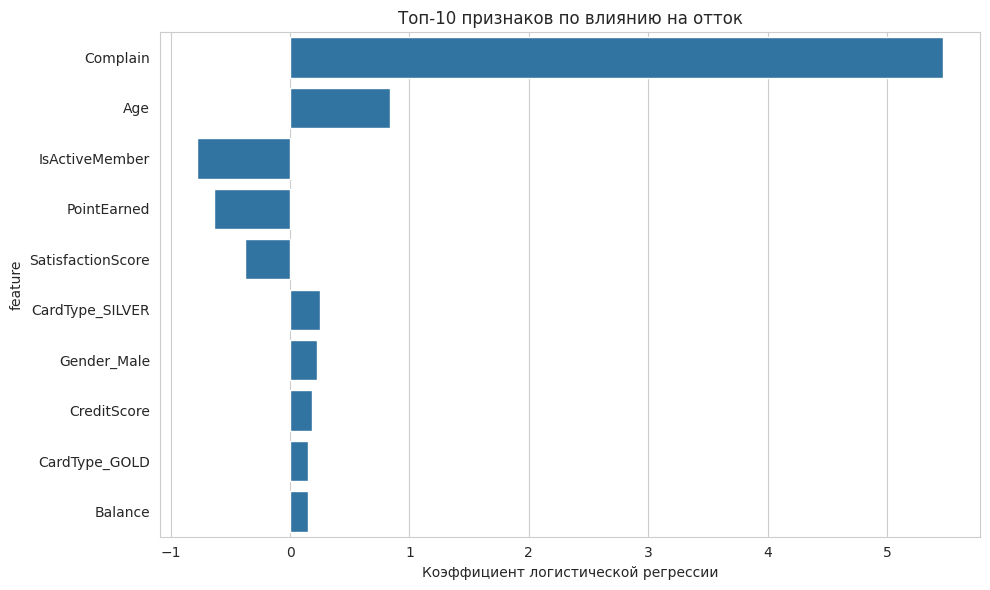

In [123]:
# Получаем коэффициенты и названия признаков
coefficients = model.coef_[0]
feature_names = X.columns

# Создаём DataFrame для удобства
coef_df = pd.DataFrame({'feature': feature_names, 'coef': coefficients})
coef_df['abs_coef'] = np.abs(coef_df['coef'])
coef_df = coef_df.sort_values('abs_coef', ascending=False)

print("Топ-10 признаков по модулю коэффициента:")
print(coef_df.head(10))

# Визуализируем топ-10
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df.head(10), x='coef', y='feature')
plt.title('Топ-10 признаков по влиянию на отток')
plt.xlabel('Коэффициент логистической регрессии')
plt.tight_layout()
plt.show()

## Улучшение модели / Эксперименты

In [124]:
# Исключаем Complain
X_no_complain = X.drop('Complain', axis=1)
X_train_nc, X_test_nc, y_train_nc, y_test_nc = train_test_split(X_no_complain, y, test_size=0.2, random_state=42, stratify=y)

# Масштабируем
scaler_nc = StandardScaler()
X_train_nc_scaled = scaler_nc.fit_transform(X_train_nc)
X_test_nc_scaled = scaler_nc.transform(X_test_nc)

# Обучаем
model_nc = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
model_nc.fit(X_train_nc_scaled, y_train_nc)

# Оценка
y_pred_nc = model_nc.predict(X_test_nc_scaled)
print("Модель без Complain:")
print(classification_report(y_test_nc, y_pred_nc, target_names=['Остался', 'Ушёл']))
print(f"ROC-AUC: {roc_auc_score(y_test_nc, model_nc.predict_proba(X_test_nc_scaled)[:,1]):.4f}")

Модель без Complain:
              precision    recall  f1-score   support

     Остался       0.91      0.71      0.80      1592
        Ушёл       0.39      0.72      0.51       408

    accuracy                           0.71      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.80      0.71      0.74      2000

ROC-AUC: 0.7797


## Выводы и рекомендации

### Ключевые факторы оттока (Итоги анализа)

- **Критический фактор:** Наличие жалобы (`Complain`). Клиент, подавший жалобу, уходит в **99% случаев**. Это не предиктор, а констатация факта.
- **Демография:** Возраст (клиенты **50+** уходят чаще), География (**Германия**).
- **Поведение:** Неактивные члены (`IsActiveMember`), клиенты с **3+ продуктами** (`NumOfProducts`).
- **Незначимые факторы:** Удовлетворённость (`SatisfactionScore`), Тип карты, Накопленные баллы (вероятно, прокси‑метрики не отражают реальную лояльность). 

### Оценка прогностической модели

- **Базовая модель (с жалобами)** показывает отличное качество (ROC-AUC **> 0.9**), но бесполезна для бизнеса, так как жалоба уже произошла.
- **Реалистичная модель (без жалоб)** показывает приемлемое качество (ROC-AUC **~ 0.78**). Это хороший baseline для сегментации клиентов, но требует улучшения для внедрения в скоринг.


### Рекомендации для бизнеса


#### А. Система реагирования на жалобы
Внедрить процесс **немедленного контакта** с клиентом при поступлении жалобы. Шансы удержать низки, но это последний рубеж обороны.

#### Б. Проактивные стратегии удержания

- **Для возрастных клиентов (50+):**  
  Разработать специальные предложения по накоплениям, пенсионные программы, назначить персональных менеджеров.

- **Для неактивных клиентов:**  
  Запустить **reactivation‑кампании** (кэшбэк за первую покупку после простоя, бонусы за вход в приложение).

- **Для клиентов с 3+ продуктами:**  
  Провести аудит продуктовой корзины. Возможно, клиенты не понимают выгоды или, наоборот, имеют избыточное количество платных услуг. Предложить консолидацию или пакетные предложения со скидкой.

- **Для Германии:**  
  Провести дополнительное качественное исследование (интервью с ушедшими клиентами), чтобы понять локальные причины (конкуренты, качество сервиса в отделениях).




### Ограничения и пути улучшения модели

**Ограничения:**  
Модель не учитывает динамику поведения клиента во времени (только срез на момент датасета). Нет данных о транзакциях, частоте входов в банк.

**Пути улучшения:**

1. **Feature Engineering:**  
   Создать **RFM‑признаки** (Recency, Frequency, Monetary) на основе транзакционных данных (если они доступны).

2. **Сложные алгоритмы:**  
   Попробовать градиентный бустинг (**CatBoost, XGBoost**), который лучше учитывает нелинейные зависимости.

3. **Сбор данных:**  
   Внедрить сбор динамических опросов удовлетворённости (например, после каждого обращения в поддержку).